# The Nature Conservancy Fisheries Monitoring

__Detect and classify species of fish__

The Conservancy is looking to the future by using cameras to dramatically scale the monitoring of fishing activities to fill critical science and compliance monitoring data gaps. Although these electronic monitoring systems work well and are ready for wider deployment, the amount of raw data produced is cumbersome and expensive to process manually.

The Conservancy is inviting the Kaggle community to develop algorithms to automatically detect and classify species of tunas, sharks and more that fishing boats catch, which will accelerate the video review process. Faster review and more reliable data will enable countries to reallocate human capital to management and enforcement activities which will have a positive impact on conservation and our planet.

https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring

### Exploring the dataset

> Eight target categories are available in this dataset: Albacore tuna, Bigeye tuna, Yellowfin tuna, Mahi Mahi, Opah, Sharks, Other (meaning that there are fish present but not in the above categories), and No Fish (meaning that no fish is in the picture). Each image has only one fish category, except that there are sometimes very small fish in the pictures that are used as bait. 

![species](https://kaggle2.blob.core.windows.net/competitions/kaggle/5568/media/species-ref-key.jpg)

Let's check the first image

In [1]:
data_path = "G:/Kaggle_FisheriesMonitoring/"
import os
import pandas as pd

In [2]:
from PIL import Image
im = Image.open("G:/Kaggle_FisheriesMonitoring/train/ALB\img_00003.jpg")
im.size

(1280, 720)

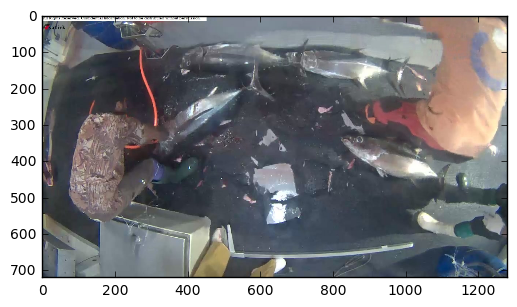

In [3]:
%matplotlib inline
from matplotlib.pyplot import imshow 
imshow(im)

### Getting information about the images

Training Set

In [4]:
#This can take a few minutes
from PIL import Image
dataset_path = data_path + "train/"
imaglist_train = pd.DataFrame(columns=["Class", "Image", "Imagepath", "Size"])
for (folder, subs, files) in os.walk(dataset_path):
    for filename in files:
        fish = folder.split("/")[-1]
        imagepath = os.path.join(folder, filename)
        image = Image.open(imagepath)
        size = image.size
        imaglist_train = imaglist_train.append({"Class":fish, 
                                                "Image":filename, 
                                                "Imagepath":imagepath, 
                                                "Size":size}, ignore_index=True)
    

In [5]:
imaglist_train.to_csv(data_path+"train_images_info.csv", index=False)

In [15]:
print("There are %s images in the training set" % (len(imaglist_train)))

There are 3777 images in the training set


Testing Set (stage 1)

In [7]:
from PIL import Image
dataset_path = data_path + "test_stg1/"
imaglist_test = pd.DataFrame(columns=["Image", "Imagepath", "Size"])
for (folder, subs, files) in os.walk(dataset_path):
    for filename in files:
        imagepath = os.path.join(folder, filename)
        image = Image.open(imagepath)
        size = image.size
        imaglist_test = imaglist_test.append({"Image":filename, "Imagepath":imagepath, "Size":size}, ignore_index=True)
    

In [16]:
print("%s images in the test set" % (len(imaglist_test)))

1000 images in the test set


### Class distribution

In [9]:
imaglist_train["Class"].value_counts(normalize=True)

ALB      0.455123
YFT      0.194334
NoF      0.123114
OTHER    0.079163
BET      0.052952
SHARK    0.046598
DOL      0.030977
LAG      0.017739
Name: Class, dtype: float64

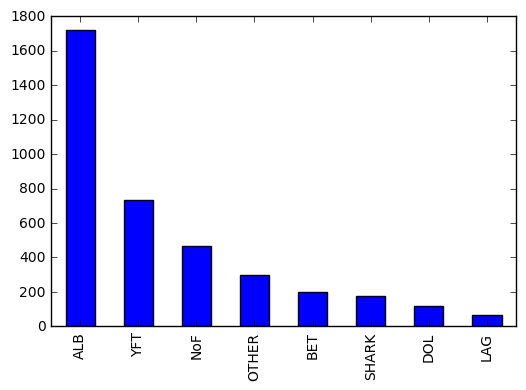

In [10]:
imaglist_train["Class"].value_counts().plot(kind='bar')

_Size distribution_

In [11]:
imaglist_train["Size"].value_counts(normalize=True)

(1280, 720)    0.575589
(1280, 750)    0.158327
(1280, 974)    0.104580
(1276, 718)    0.058247
(1192, 670)    0.052423
(1280, 924)    0.015886
(1518, 854)    0.010326
(1732, 974)    0.009267
(1334, 750)    0.008208
(1244, 700)    0.007149
Name: Size, dtype: float64

In [12]:
imaglist_test["Size"].value_counts(normalize=True)

(1280, 720)    0.606
(1280, 750)    0.148
(1280, 974)    0.098
(1276, 718)    0.057
(1192, 670)    0.045
(1518, 854)    0.021
(1334, 750)    0.011
(1280, 924)    0.007
(1244, 700)    0.004
(1732, 974)    0.003
Name: Size, dtype: float64